In [210]:
# no need for this since it has nothing outside classes and functions
print(__name__)
if __name__ == "__main__" and hasattr(__builtins__,'__IPYTHON__') and ('google.colab' in str(get_ipython())):
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/PressureReliefWorkArea/SummerWork/
    !ls
    print("maybe uh oh maybe yippee")

__main__


In [211]:
from itertools import combinations_with_replacement

%run -n CNNModel.ipynb

c:\Users\fl4m1\.conda\envs\wsresearch\lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Reading file...
	File directory from cwd is "../Data/"
	File name is "COMBINED_Type3-Freq10-Labeled_Motion-sessions_23-24_Fall.csv".
	File name read as "COMBINED_Type3-WithClassNum16-Freq10-BufferType0-BufferNum0-UserType0-UserID0-Labeled_Motion-sessions_23-24_Fall.csv".
Logged state 0 as {'ds_format': ('NDArray JFAccelDataset Pair', 2), 'description': 'Type 3, Unchanged', 'datasets': (<__main__.JFAccelDataset object at 0x00000255565FAE00>, <__main__.JFAccelDataset object at 0x00000255551532B0>), 'classification': 3, 'bufferpref': 'Inner', 'is_argmax_format': False, 'inputnum': 3, 'dataset_types': ('Train', 'Test')}



Training Type 3 model on Type 3 data with Sequence Length 10


Read state 1 as {'ds_format': ('NDArray JFAccelDataset Pair', 2), 'description': 'Type 3, StatAndOth Repressed', 'datasets': (<__main__.JFAccelDataset object at 0x0000025555152590>, <__main__.JFAccelDataset object at 0x0000025555151180>), 'classification': 3, 'bufferpref': 'Inner', 'is_argmax_format': False, 

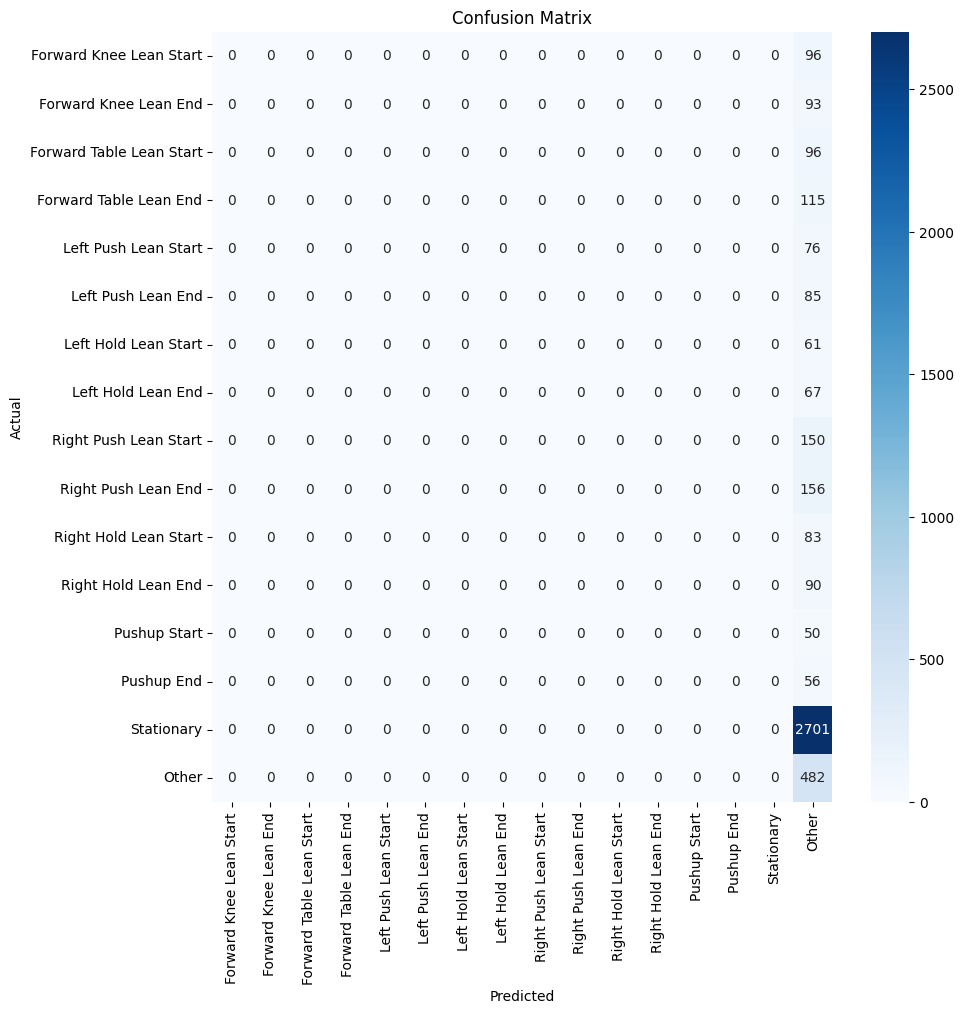

loggggggg
{'ds_format': ('NDArray JFAccelDataset Pair', 2), 'description': 'Type 3, Unchanged', 'datasets': (<__main__.JFAccelDataset object at 0x00000255565FAE00>, <__main__.JFAccelDataset object at 0x00000255551532B0>), 'classification': 3, 'bufferpref': 'Inner', 'is_argmax_format': False, 'inputnum': 3, 'dataset_types': ('Train', 'Test')}
Recalled state 0 as {'ds_format': ('NDArray JFAccelDataset Pair', 2), 'description': 'Type 3, Unchanged', 'datasets': (<__main__.JFAccelDataset object at 0x00000255565FAE00>, <__main__.JFAccelDataset object at 0x00000255551532B0>), 'classification': 3, 'bufferpref': 'Inner', 'is_argmax_format': False, 'inputnum': 3, 'dataset_types': ('Train', 'Test')}
(17826, 4457)
(<class '__main__.JFAccelDataset'>, <class '__main__.JFAccelDataset'>)
{0: [0, 2], 1: [1, 3], 2: [4, 6], 3: [5, 7], 4: [8, 10], 5: [9, 11], 6: [12], 7: [13], 8: [14], 9: [15]}
{0: [0, 2], 1: [1, 3], 2: [4, 6], 3: [5, 7], 4: [8, 10], 5: [9, 11], 6: [12], 7: [13], 8: [14], 9: [15]}
Logged 

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [212]:
# CM: Confusion Matrix
# AC: After Correction (this will not be a tag for long)
# RSOAM / SOToAdjMean: "Repressed Stationary and Other to Adjusted Mean" (Adjusted Mean being the mean of ever other class count)
# NR: Not Repressed

# ModelType / Type: Classification Type the model was trained on
# EvalType: Classification Type the model was evaluated on
# Freq: Frequency the data was obtained at
# SeqLen / sl: Sequence Length the model uses



# cnnmodel.load_model('./Old Model correction/models/model-Type3-FullDataset-AfterCorrection.pth', 3)
# FullDataset-AfterCorrection-StationaryAndOther_to_AdjustedMean
# cnnT3model.train('./Results after 6_24_2024/7_5_2024/models/model-Type3-FD-AC-SO_to_AdjMean.pth', True)

def train_model(model, ctype, seq_len, feedback = False):
    model.train(f'./Results after 6_24_2024/7_5_2024/models/model-AC-Type{ctype}_SeqLen{seq_len}_SOToAdjMean.pth', 0, feedback)
def test_model(model, in_ctype, out_ctype, seq_len, feedback = False):
    model.evaluate(True, f'./Results after 6_24_2024/7_5_2024/CMs/CM-AC-ModelType{in_ctype}_SeqLen{seq_len}_RSOAM-EvalType{out_ctype}_NR.png', feedback)
# models for current testing (newest to oldest)
# './Results after 6_24_2024/6_30_2024/models/model-Type3-FD-AC-SO_to_AdjMean.pth'
# './Old Model correction/models/model-Type3-FullDataset-AfterCorrection.pth'
# '../model-5_29_2024-AdjustStatANDOtherToAdjMean_Type3.pth'
yippee = True

for sl in range(10, 55, 5):
    models = {3: JFNetModel(sl)}
    models[3].load_data(SKFileNameHandler.get_filename_for_classtype(3), True)
    # yes, the 3 and the 2 are out of order, this is on purpose
    for i, j in combinations_with_replacement((3, 2, 5, 6, 7, 8), 2):
        if i == j:
            if i != 3:
                models[i] = JFNetModel(sl)
                models[i].tempfunc_mount_loader(models[3].get_loader(), i)
                if yippee:
                    print("\tyippee")
                    yippee = not yippee
                raise Exception("yippee")
            print(f"\n\n\nTraining Type {i} model on Type {j} data with Sequence Length {sl}\n\n")
            train_model(models[i], i, sl, (3, 3) == (i, j))
        else:
            models[i].change_io_specs(j) # , False
        print(f"\n\n\Evaluating Type {i} model on Type {j} data with Sequence Length {sl}\n\n")
        test_model(models[i], i, j, sl, (3, 3) == (i, j))

In [ ]:
# cnnT5model = JFNetModel(10)
# cnnT5model.tempfunc_mount_loader(cnnT3model.get_loader(), 5)

# # cnnmodel.load_model('./Old Model correction/models/model-Type3-FullDataset-AfterCorrection.pth', 3)
# # FullDataset-AfterCorrection-StationaryAndOther_to_AdjustedMean
# cnnT5model.train('./Results after 6_24_2024/7_5_2024/models/model-Type3-FD-AC-SO_to_AdjMean.pth', True)

# # models for current testing (newest to oldest)
# # './Results after 6_24_2024/6_30_2024/models/model-Type3-FD-AC-SO_to_AdjMean.pth'
# # './Old Model correction/models/model-Type3-FullDataset-AfterCorrection.pth'
# # '../model-5_29_2024-AdjustStatANDOtherToAdjMean_Type3.pth'

# # cnnT5model.change_io_specs(5) # , False
# cnnT5model.evaluate()